# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.time()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | xianning
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | aleksandrovsk-sakhalinskiy
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | anabar
City not found. Skipping...
Processing Record 12 of Set 1 | sarmiento
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | manatutu
City not found. Skipping...
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | happy valley-goose bay
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | barbastro
Processing Rec

Processing Record 39 of Set 4 | nouna
Processing Record 40 of Set 4 | kristiansund
Processing Record 41 of Set 4 | mugia
Processing Record 42 of Set 4 | chilca
Processing Record 43 of Set 4 | toga village
City not found. Skipping...
Processing Record 44 of Set 4 | tocopilla
Processing Record 45 of Set 4 | chinsali
Processing Record 46 of Set 4 | gaoual
Processing Record 47 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 48 of Set 4 | nichinan
Processing Record 49 of Set 4 | isangel
Processing Record 0 of Set 5 | ghanzi
Processing Record 1 of Set 5 | sonsorol village
City not found. Skipping...
Processing Record 2 of Set 5 | arteche
Processing Record 3 of Set 5 | sanctuary point
Processing Record 4 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 5 of Set 5 | brookings
Processing Record 6 of Set 5 | kangding
Processing Record 7 of Set 5 | okhotsk
Processing Record 8 of Set 5 | mitu
Processing Record 9 of Set 5 | villamontes
Processing Record 

Processing Record 27 of Set 8 | puerto ayora
Processing Record 28 of Set 8 | jaora
Processing Record 29 of Set 8 | leninaul
Processing Record 30 of Set 8 | sinop
Processing Record 31 of Set 8 | nogliki
Processing Record 32 of Set 8 | naracoorte
Processing Record 33 of Set 8 | vilyuchinsk
Processing Record 34 of Set 8 | nemuro
Processing Record 35 of Set 8 | st. john's
Processing Record 36 of Set 8 | enewetak
Processing Record 37 of Set 8 | kuching
Processing Record 38 of Set 8 | redencao
Processing Record 39 of Set 8 | moron
Processing Record 40 of Set 8 | ojai
Processing Record 41 of Set 8 | smithers
Processing Record 42 of Set 8 | hondo
Processing Record 43 of Set 8 | valpoy
Processing Record 44 of Set 8 | bahia de caraquez
Processing Record 45 of Set 8 | socorro
Processing Record 46 of Set 8 | tadine
Processing Record 47 of Set 8 | svetlogorsk
Processing Record 48 of Set 8 | katsuura
Processing Record 49 of Set 8 | along
Processing Record 0 of Set 9 | svetlyy
Processing Record 1 of 

Processing Record 17 of Set 12 | minas de matahambre
City not found. Skipping...
Processing Record 18 of Set 12 | selebi-phikwe
Processing Record 19 of Set 12 | abashiri
Processing Record 20 of Set 12 | cooper's town
Processing Record 21 of Set 12 | taltal
Processing Record 22 of Set 12 | brigantine
Processing Record 23 of Set 12 | mityana
Processing Record 24 of Set 12 | castillos
Processing Record 25 of Set 12 | paita
Processing Record 26 of Set 12 | olgii
City not found. Skipping...
Processing Record 27 of Set 12 | westport
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,273.76,64,75,9.77,CA,1.682610e+09
1,xianning,29.8833,114.2167,291.49,77,65,0.79,CN,1.682610e+09
2,edinburgh of the seven seas,-37.0676,-12.3116,290.43,77,97,8.64,SH,1.682610e+09
3,yellowknife,62.4560,-114.3525,273.46,100,100,4.63,CA,1.682610e+09
4,aleksandrovsk-sakhalinskiy,50.8975,142.1561,273.40,99,100,1.61,RU,1.682610e+09


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
csv_city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
csv_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,273.76,64,75,9.77,CA,1.682610e+09
1,xianning,29.8833,114.2167,291.49,77,65,0.79,CN,1.682610e+09
2,edinburgh of the seven seas,-37.0676,-12.3116,290.43,77,97,8.64,SH,1.682610e+09
3,yellowknife,62.4560,-114.3525,273.46,100,100,4.63,CA,1.682610e+09
4,aleksandrovsk-sakhalinskiy,50.8975,142.1561,273.40,99,100,1.61,RU,1.682610e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

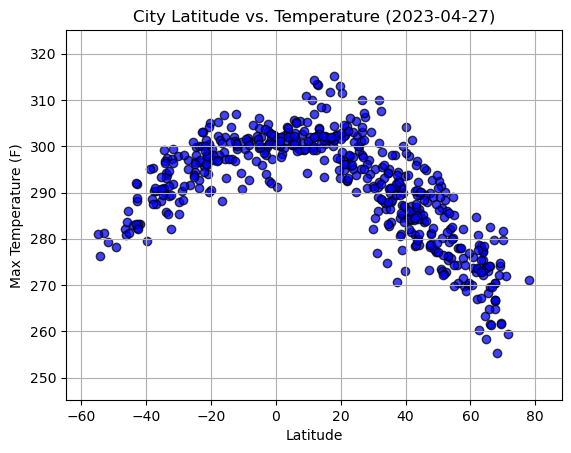

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(csv_city_data_df["Lat"], csv_city_data_df["Max Temp"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.ylim(csv_city_data_df["Max Temp"].min()-10,csv_city_data_df["Max Temp"].max()+10)
plt.xlim(csv_city_data_df["Lat"].min()-10,csv_city_data_df["Lat"].max()+10)
plt.title("City Latitude vs. Temperature (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

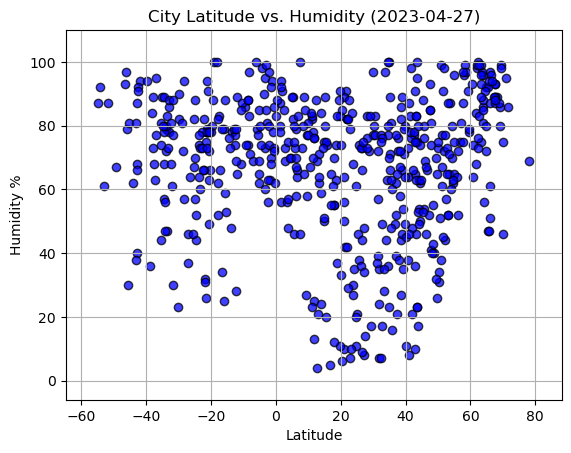

In [36]:
# Build the scatter plots for latitude vs. humidity
# Build scatter plot for latitude vs. temperature
plt.scatter(csv_city_data_df["Lat"], csv_city_data_df["Humidity"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.ylim(csv_city_data_df["Humidity"].min()-10,csv_city_data_df["Humidity"].max()+10)
plt.xlim(csv_city_data_df["Lat"].min()-10,csv_city_data_df["Lat"].max()+10)
plt.title("City Latitude vs. Humidity (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

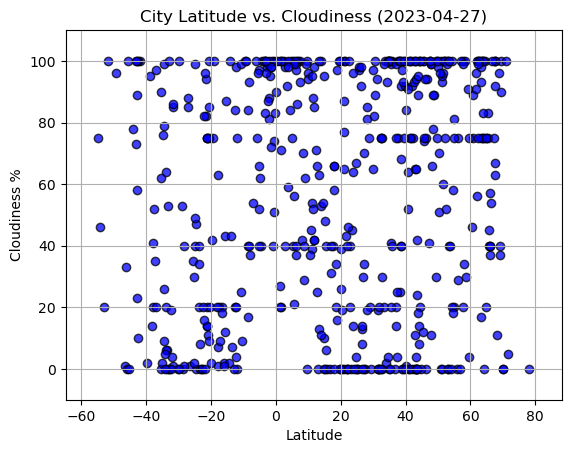

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(csv_city_data_df["Lat"], csv_city_data_df["Cloudiness"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.ylim(csv_city_data_df["Cloudiness"].min()-10,csv_city_data_df["Cloudiness"].max()+10)
plt.xlim(csv_city_data_df["Lat"].min()-10,csv_city_data_df["Lat"].max()+10)
plt.title("City Latitude vs. Cloudiness (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

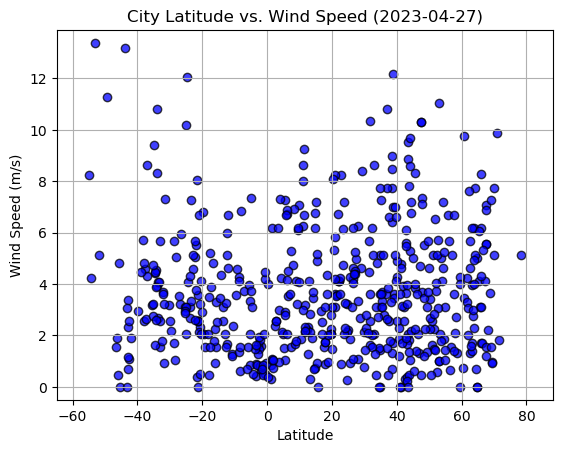

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(csv_city_data_df["Lat"], csv_city_data_df["Wind Speed"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.ylim(csv_city_data_df["Wind Speed"].min()-0.5,csv_city_data_df["Wind Speed"].max()+0.5)
plt.xlim(csv_city_data_df["Lat"].min()-10,csv_city_data_df["Lat"].max()+10)
plt.title("City Latitude vs. Wind Speed (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
#df_slope, df_int, df_r, df_p, df_std_err = stats.linregress(x, y)
#df_fit = df_slope * df_latitude + df_int

In [4]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = csv_city_data_df[csv_city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,273.76,64,75,9.77,CA,1.682610e+09
1,xianning,29.8833,114.2167,291.49,77,65,0.79,CN,1.682610e+09
3,yellowknife,62.4560,-114.3525,273.46,100,100,4.63,CA,1.682610e+09
4,aleksandrovsk-sakhalinskiy,50.8975,142.1561,273.40,99,100,1.61,RU,1.682610e+09
5,aykhal,66.0000,111.5000,261.63,97,37,1.70,RU,1.682610e+09


In [5]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = csv_city_data_df[csv_city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,290.43,77,97,8.64,SH,1.682610e+09
7,avarua,-21.2078,-159.7750,297.18,78,20,2.57,CK,1.682610e+09
8,port alfred,-33.5906,26.8910,293.81,83,6,2.68,ZA,1.682610e+09
10,sarmiento,-45.5882,-69.0700,286.10,30,100,4.82,AR,1.682610e+09
11,port mathurin,-19.6833,63.4167,299.41,80,42,6.79,MU,1.682610e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.740407914642635


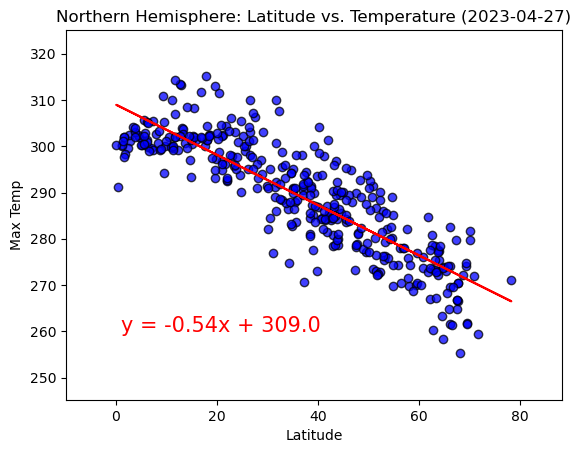

In [61]:
#Scatter Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(northern_hemi_df["Max Temp"].min()-10,northern_hemi_df["Max Temp"].max()+10)
plt.xlim(northern_hemi_df["Lat"].min()-10,northern_hemi_df["Lat"].max()+10)
plt.title("Northern Hemisphere: Latitude vs. Temperature (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Linear regression on Northern Hemisphere
df_slope, df_int, df_r, df_p, df_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
df_fit = df_slope * northern_hemi_df["Lat"] + df_int
plt.plot(northern_hemi_df["Lat"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(1,260),fontsize=15,color="red")
print(f"The r-value is: {df_r**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.5973144538932943


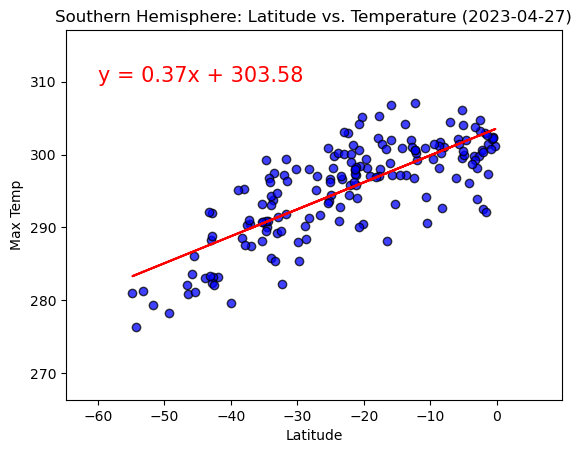

In [62]:
#Scatter Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(southern_hemi_df["Max Temp"].min()-10,southern_hemi_df["Max Temp"].max()+10)
plt.xlim(southern_hemi_df["Lat"].min()-10,southern_hemi_df["Lat"].max()+10)
plt.title("Southern Hemisphere: Latitude vs. Temperature (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Linear regression on Southern Hemisphere
df_slope, df_int, df_r, df_p, df_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
df_fit = df_slope * southern_hemi_df["Lat"] + df_int
plt.plot(southern_hemi_df["Lat"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(-60,310),fontsize=15,color="red")
print(f"The r-value is: {df_r**2}")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The temperature in the Northern Hemisphere decreases as the latitude increases.  The temperature in the Southern Hemisphere increases as the latitude increases. The temperature in both hemispheres increases as the latitude approaches 0. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.045903573695867846


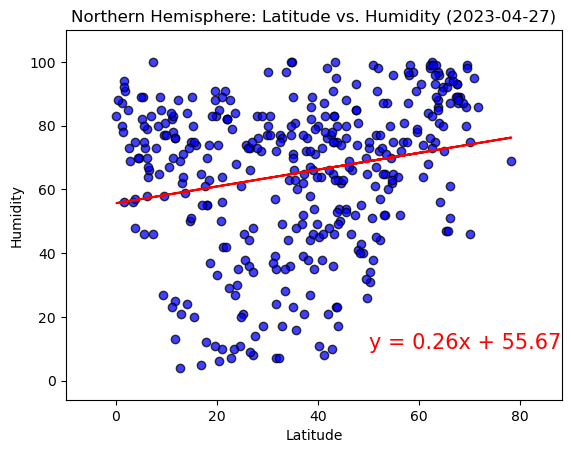

In [63]:
# Northern Hemisphere Humidity vs Latitude
#Scatter Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(northern_hemi_df["Humidity"].min()-10,northern_hemi_df["Humidity"].max()+10)
plt.xlim(northern_hemi_df["Lat"].min()-10,northern_hemi_df["Lat"].max()+10)
plt.title("Northern Hemisphere: Latitude vs. Humidity (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Linear regression on Northern Hemisphere
df_slope, df_int, df_r, df_p, df_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
df_fit = df_slope * northern_hemi_df["Lat"] + df_int
plt.plot(northern_hemi_df["Lat"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
print(f"The r-value is: {df_r**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r-value is: 0.0060967827541592995


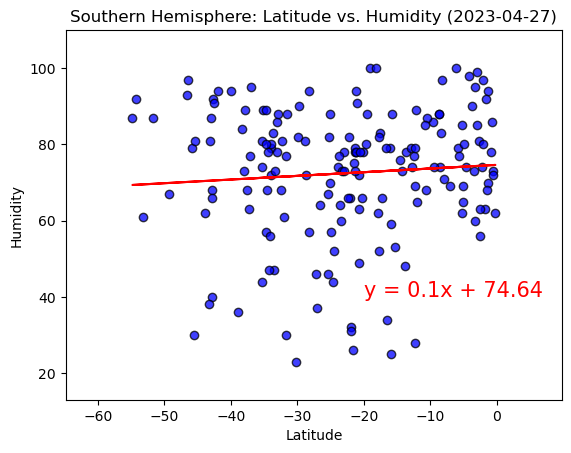

In [64]:
# Southern Hemisphere Humidity vs Latitude
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(southern_hemi_df["Humidity"].min()-10,southern_hemi_df["Humidity"].max()+10)
plt.xlim(southern_hemi_df["Lat"].min()-10,southern_hemi_df["Lat"].max()+10)
plt.title("Southern Hemisphere: Latitude vs. Humidity (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Linear regression on Southern Hemisphere
df_slope, df_int, df_r, df_p, df_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
df_fit = df_slope * southern_hemi_df["Lat"] + df_int
plt.plot(southern_hemi_df["Lat"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
print(f"The r-value is: {df_r**2}")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is a slight positive correlation between latitude and humidity, where the higher the latitude the greater the percentage of humidity. In the Southern Hemisphere there is very little correlation between latitude and humidity.  However, both the Northern and Southern Hemispheres indicate a slight positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0053753721503113725


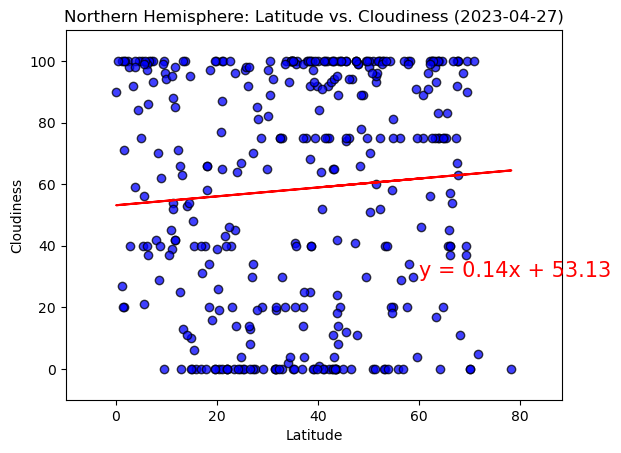

In [65]:
# Northern Hemisphere Cloudiness vs Latitude
#Scatter Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(northern_hemi_df["Cloudiness"].min()-10,northern_hemi_df["Cloudiness"].max()+10)
plt.xlim(northern_hemi_df["Lat"].min()-10,northern_hemi_df["Lat"].max()+10)
plt.title("Northern Hemisphere: Latitude vs. Cloudiness (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Linear regression on Northern Hemisphere
df_slope, df_int, df_r, df_p, df_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
df_fit = df_slope * northern_hemi_df["Lat"] + df_int
plt.plot(northern_hemi_df["Lat"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(60,30),fontsize=15,color="red")
print(f"The r-value is: {df_r**2}")

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r-value is: 0.05687606619945885


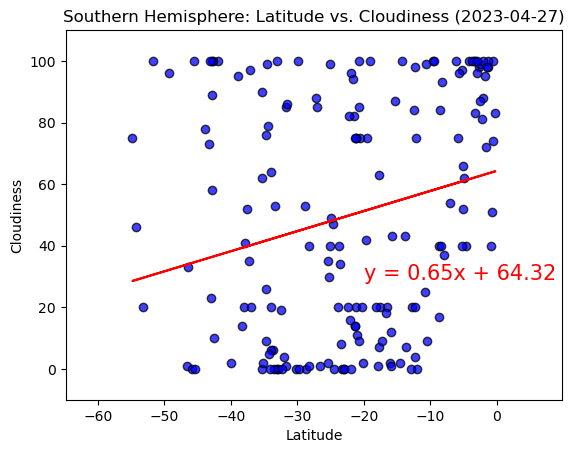

In [66]:
# Southern Hemisphere Cloudiness vs Latitude
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(southern_hemi_df["Cloudiness"].min()-10,southern_hemi_df["Cloudiness"].max()+10)
plt.xlim(southern_hemi_df["Lat"].min()-10,southern_hemi_df["Lat"].max()+10)
plt.title("Southern Hemisphere: Latitude vs. Cloudiness (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Linear regression on Southern Hemisphere
df_slope, df_int, df_r, df_p, df_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
df_fit = df_slope * southern_hemi_df["Lat"] + df_int
plt.plot(southern_hemi_df["Lat"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(-20,29),fontsize=15,color="red")
print(f"The r-value is: {df_r**2}")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is very little correlation between latitude and cloudiness. In the Southern Hemisphere there is a positive correlation between latitude and cloudiness, where the higher the latitude the greater the percentage of cloudiness. While both the Northern and Southern Hemispheres technically indicate a slight positive correlation between latitude and cloudiness, the Southern Hemisphere latitude is much more strongly correlated to cloudiness than the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0029469636935751577


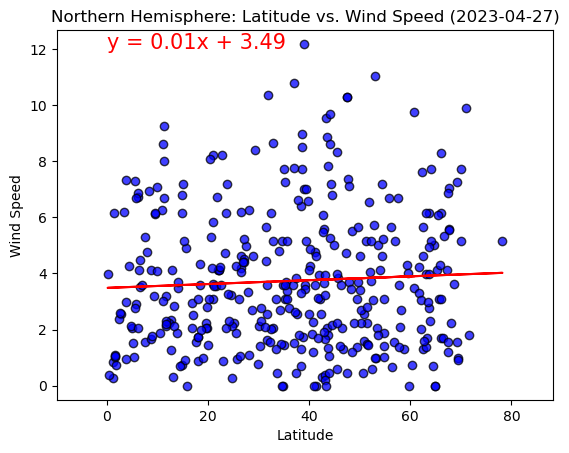

In [9]:
# Northern Hemisphere Wind Speed vs Latitude
#Scatter Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(northern_hemi_df["Wind Speed"].min()-0.5,northern_hemi_df["Wind Speed"].max()+0.5)
plt.xlim(northern_hemi_df["Lat"].min()-10,northern_hemi_df["Lat"].max()+10)
plt.title("Northern Hemisphere: Latitude vs. Wind Speed (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Linear regression on Northern Hemisphere
df_slope, df_int, df_r, df_p, df_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
df_fit = df_slope * northern_hemi_df["Lat"] + df_int
plt.plot(northern_hemi_df["Lat"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
print(f"The r-value is: {df_r**2}")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-value is: 0.11016520532895208


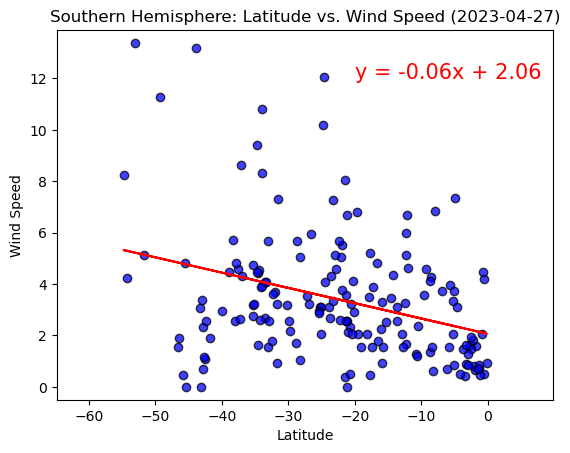

In [10]:
# Southern Hemisphere Wind Speed vs Latitude
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(southern_hemi_df["Wind Speed"].min()-0.5,southern_hemi_df["Wind Speed"].max()+0.5)
plt.xlim(southern_hemi_df["Lat"].min()-10,southern_hemi_df["Lat"].max()+10)
plt.title("Southern Hemisphere: Latitude vs. Wind Speed (2023-04-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Linear regression on Southern Hemisphere
df_slope, df_int, df_r, df_p, df_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
df_fit = df_slope * southern_hemi_df["Lat"] + df_int
plt.plot(southern_hemi_df["Lat"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,2)) + "x + " + str(round(df_int,2))
plt.annotate(line_eq,(-20,12),fontsize=15,color="red")
print(f"The r-value is: {df_r**2}")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is almost no correlation between latitude and wind speed. In the Southern Hemisphere there is a slight negative correlation between latitude and wind speed, where the higher the latitude the slower the wind speed. While the correlation between latitude and wind speed in both the Northern and Southern Hemispheres is slight, the wind speed in both hemispheres trends toward decreasing as the latitude approaches 0.